In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dafarizkiyanto/dataset-pln-mobile/main/VALID_DATA.csv")
df.drop(columns = ['Ulasan','cleaned_text','stopword_removal','tanpa_stemming','stemmed','token_tanpa_stemming'],inplace = True)
df.columns = ['Sentimen','Ulasan']
df.head()

,Sentimen,Ulasan
0,Positif,"['responsif', 'tanggap', 'lapor', 'kendala', '..."
1,Positif,"['aplikasi', 'bagus', 'cek', 'tagih', 'listrik..."
2,Positif,"['pln', 'mobile', 'urus', 'listrik', 'mudah', ..."
3,Positif,"['aplikasi', 'pln', 'mobile', 'bagus', 'bantu']"
4,Positif,"['fitur', 'beli', 'token', 'adu', 'lumayan', '..."


In [4]:
# df= pd.read_csv('VALID_dATA.csv',encoding = 'latin-1')
# df.drop(columns = ['Ulasan','cleaned_text','stopword_removal','stemmed','stemmed_tokenized'],inplace = True)
# df.columns = ['Sentimen','Ulasan']
# df.head()

In [5]:
df.dropna(inplace=True)

In [6]:
df['Ulasan']

,Ulasan
0,"['responsif', 'tanggap', 'lapor', 'kendala', '..."
1,"['aplikasi', 'bagus', 'cek', 'tagih', 'listrik..."
2,"['pln', 'mobile', 'urus', 'listrik', 'mudah', ..."
3,"['aplikasi', 'pln', 'mobile', 'bagus', 'bantu']"
4,"['fitur', 'beli', 'token', 'adu', 'lumayan', '..."
...,...
1370,"['fasilitas', 'bayar', 'beli', 'pulsa', 'mudah..."
1371,"['aju', 'adu', 'input', 'no', 'id', 'baca']"
1372,"['transaksi', 'beli', 'token', 'mudah', 'cepat..."
1373,"['bantu', 'saat', 'darurat', 'moga', 'bantu', ..."


In [7]:
df['Sentimen']

,Sentimen
0,Positif
1,Positif
2,Positif
3,Positif
4,Positif
...,...
1370,Positif
1371,Negatif
1372,Positif
1373,Positif


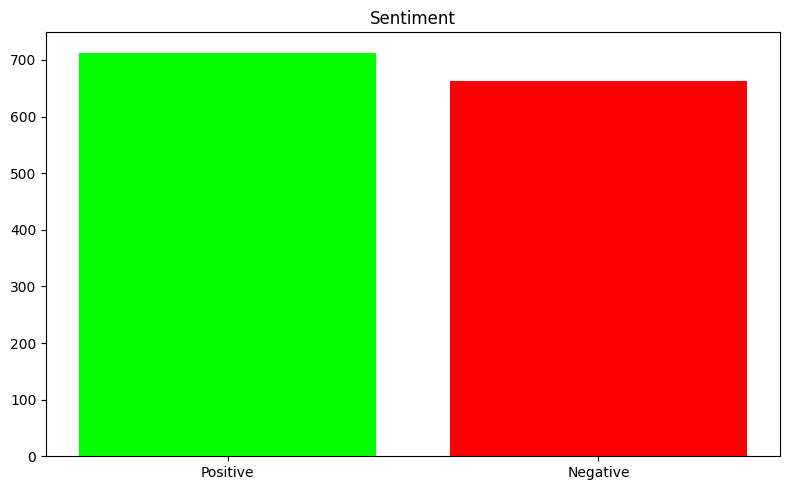

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color palette with red and green
custom_palette = sns.color_palette(['#00ff00','#ff0000'])  # Red and Green

# Assuming df is your DataFrame and 'Sentimen' is the column of interest
plt.figure(figsize=(8, 5), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df['Sentimen'].value_counts(),
        color=custom_palette)
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()


# **JUMLAH SENTIMEN POSITIF**

In [9]:
count = 0
for index, row in df.iterrows():
    if row['Sentimen'] == 'Positif':
        count += 1
print(count, "positif")


713 positif


# **JUMLAH SENTIMEN NEGATIF**

In [10]:
count = 0
for index, row in df.iterrows():
    if row['Sentimen'] == 'Negatif':
        count += 1
print(count, "negatif")


662 negatif


In [11]:
X = df['Ulasan']
y = df['Sentimen']

In [12]:
X2 = df['Ulasan']
y2 = df['Sentimen']

# **DATA SPLITTING**

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2,random_state=3)

In [14]:
print(df.shape)

(1375, 2)


In [15]:
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

1100
1100
275
275


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# **Klasifikasi Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [24]:
y_pred = classifier.predict(tfidf_test_vectors)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Negatif       0.81      0.85      0.83       141
     Positif       0.83      0.78      0.81       134

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



Random Forest Performance:
Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

     Negatif       0.81      0.85      0.83       141
     Positif       0.83      0.78      0.81       134

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



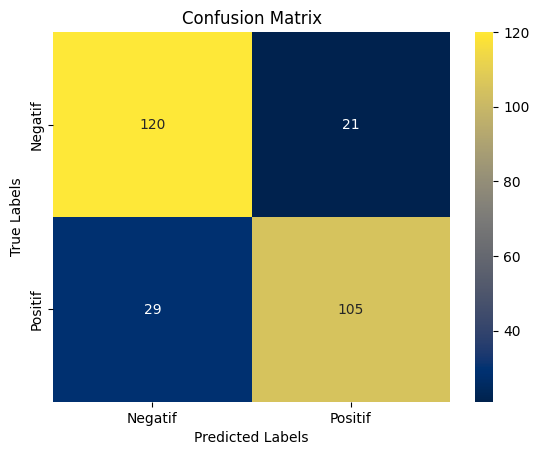

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# **TF-IDF UNIGRAM**

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df2 = pd.read_csv("https://raw.githubusercontent.com/dafarizkiyanto/dataset-pln-mobile/main/VALID_DATA.csv")
df2.drop(columns = ['Ulasan','cleaned_text','stopword_removal','tanpa_stemming','stemmed','stemmed_tokenized'],inplace = True)
df2.columns = ['Sentimen','Ulasan']
df2.head()

,Sentimen,Ulasan
0,Positif,"['responsif', 'menanggapi', 'laporan', 'kendal..."
1,Positif,"['aplikasinya', 'bagus', 'cek', 'tagihan', 'li..."
2,Positif,"['pln', 'mobile', 'urusan', 'listrik', 'mudah'..."
3,Positif,"['aplikasi', 'pln', 'mobile', 'bagus', 'memban..."
4,Positif,"['fitur', 'pembelian', 'token', 'pengaduan', '..."


In [31]:
X2 = df2['Ulasan']
y2 = df2['Sentimen']

In [32]:
X2

,Ulasan
0,"['responsif', 'menanggapi', 'laporan', 'kendal..."
1,"['aplikasinya', 'bagus', 'cek', 'tagihan', 'li..."
2,"['pln', 'mobile', 'urusan', 'listrik', 'mudah'..."
3,"['aplikasi', 'pln', 'mobile', 'bagus', 'memban..."
4,"['fitur', 'pembelian', 'token', 'pengaduan', '..."
...,...
1370,"['fasilitas', 'pembayaran', 'pembelian', 'puls..."
1371,"['ajukan', 'pengaduan', 'input', 'no', 'id', '..."
1372,"['transaksi', 'beli', 'token', 'mudah', 'cepat..."
1373,"['membantu', 'disaat', 'darurat', 'semoga', 'm..."


In [ ]:
y2

In [33]:
from sklearn.model_selection import train_test_split
X2_train , X2_test , y2_train , y2_test = train_test_split(X2 , y2, test_size=0.2,random_state=3)

In [34]:
print(X2_train.shape[0])
print(y2_train.shape[0])
print(X2_test.shape[0])
print(y2_test.shape[0])

1100
1100
275
275


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train2_vectors = tfidf_vectorizer.fit_transform(X2_train)
tfidf_test2_vectors = tfidf_vectorizer.transform(X2_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(tfidf_train2_vectors,y2_train)

RandomForestClassifier()

In [37]:
y_pred2 = classifier.predict(tfidf_test2_vectors)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y2_test,y_pred2))

              precision    recall  f1-score   support

     Negatif       0.96      0.85      0.90       141
     Positif       0.86      0.96      0.91       134

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



Random Forest Performance:
Accuracy: 0.9054545454545454
              precision    recall  f1-score   support

     Negatif       0.96      0.85      0.90       141
     Positif       0.86      0.96      0.91       134

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



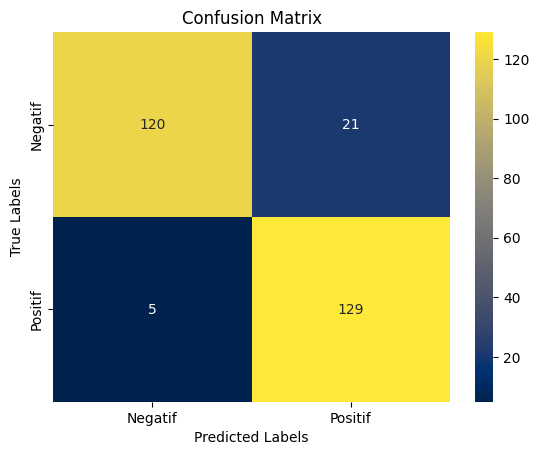

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y2_test, y_pred2))
print(classification_report(y2_test, y_pred2))

cm = confusion_matrix(y2_test, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
